In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Updated_Dataset.csv to Updated_Dataset.csv


In [ ]:
df=pd.read_csv('Updated_Dataset.csv')

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log  

In [ ]:
df

,Unnamed: 0,Datetime,BESCOM
0,0,1/1/2018 0:00,211786.8638
1,1,1/1/2018 1:00,204022.4531
2,2,1/1/2018 2:00,198376.1782
3,3,1/1/2018 3:00,198870.6240
4,4,1/1/2018 4:00,201310.4045
...,...,...,...
17515,17515,12/31/2019 19:00,248972.7234
17516,17516,12/31/2019 20:00,232655.9861
17517,17517,12/31/2019 21:00,226721.6016
17518,17518,12/31/2019 22:00,232988.5247


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df['Datetime']=pd.to_datetime(df['Datetime'],format=('%Y-%m-%d'))

In [ ]:
df=df.drop(columns='Unnamed: 0')

In [ ]:
df.index=df['Datetime']

In [ ]:
df=df.drop(columns='Datetime')

In [ ]:
df

,BESCOM
Datetime,
2018-01-01 00:00:00,211786.8638
2018-01-01 01:00:00,204022.4531
2018-01-01 02:00:00,198376.1782
2018-01-01 03:00:00,198870.6240
2018-01-01 04:00:00,201310.4045
...,...
2019-12-31 19:00:00,248972.7234
2019-12-31 20:00:00,232655.9861
2019-12-31 21:00:00,226721.6016


In [ ]:
result = adfuller(df.BESCOM.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.456007
p-value: 0.000000


In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [ ]:
pip install pmdarima --user

     |████████████████████████████████| 1.5MB 2.9MB/s 
     |████████████████████████████████| 9.5MB 19.0MB/s 


In [ ]:
from pmdarima.arima.utils import ndiffs
y = df.BESCOM

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.BESCOM.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.BESCOM.diff().dropna(), ax=axes[1])

plt.show()

ValueError: ignored

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.BESCOM.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.BESCOM.diff().dropna(), ax=axes[1])

plt.show()

ValueError: ignored

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.BESCOM, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/root/.local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/root/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be

                              ARMA Model Results                              
Dep. Variable:                 BESCOM   No. Observations:                17520
Model:                     ARMA(1, 1)   Log Likelihood             -188176.936
Method:                       css-mle   S.D. of innovations          11177.724
Date:                Fri, 28 May 2021   AIC                         376361.873
Time:                        14:44:29   BIC                         376392.957
Sample:                    01-01-2018   HQIC                        376372.108
                         - 12-31-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.402e+05   1644.820    146.059      0.000    2.37e+05    2.43e+05
ar.L1.BESCOM     0.9323      0.003    332.817      0.000       0.927       0.938
ma.L1.BESCOM     0.3198      0.006     51.65

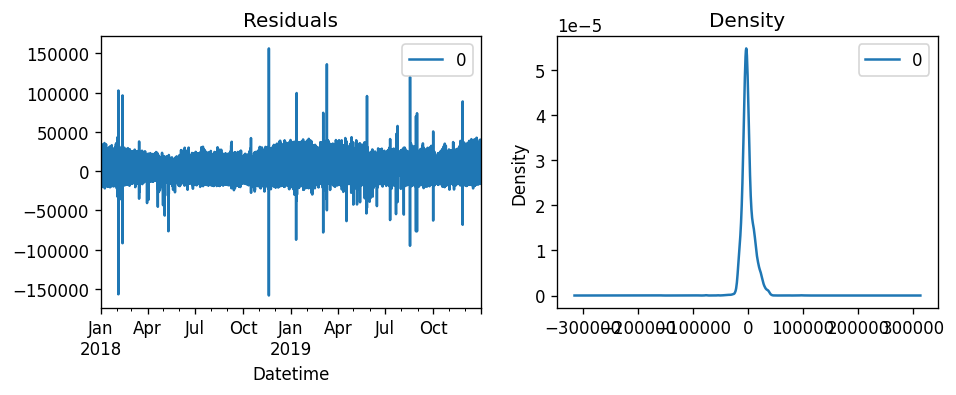

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

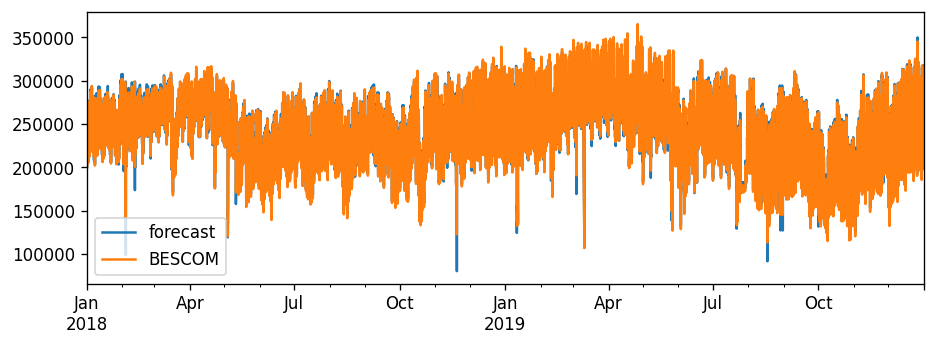

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.BESCOM[:13140]
test = df.BESCOM[13140:]

/root/.local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/root/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be

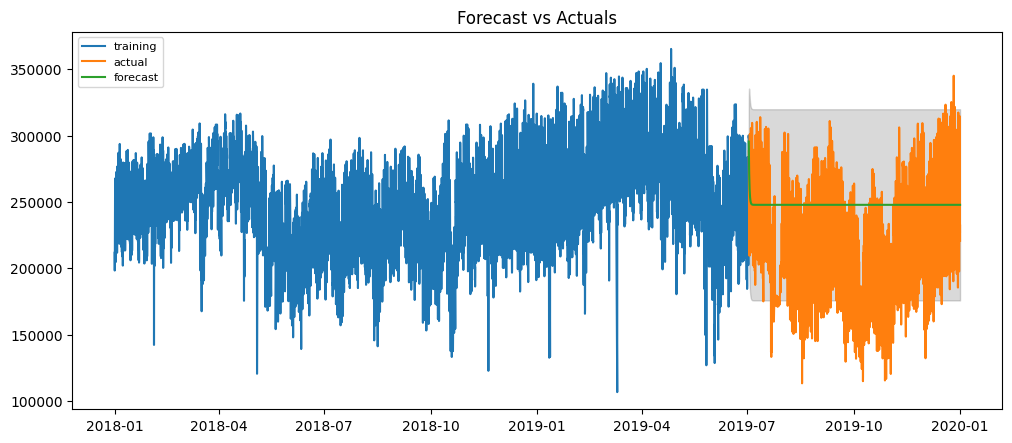

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(4380, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/root/.local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/root/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be

                             ARIMA Model Results                              
Dep. Variable:               D.BESCOM   No. Observations:                13139
Model:                 ARIMA(5, 1, 1)   Log Likelihood             -139958.286
Method:                       css-mle   S.D. of innovations          10230.389
Date:                Fri, 28 May 2021   AIC                         279932.572
Time:                        14:45:22   BIC                         279992.439
Sample:                    01-01-2018   HQIC                        279952.565
                         - 07-02-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5213     17.635      0.030      0.976     -34.043      35.086
ar.L1.D.BESCOM     1.1190      0.009    121.366      0.000       1.101       1.137
ar.L2.D.BESCOM    -0.0989      0.013

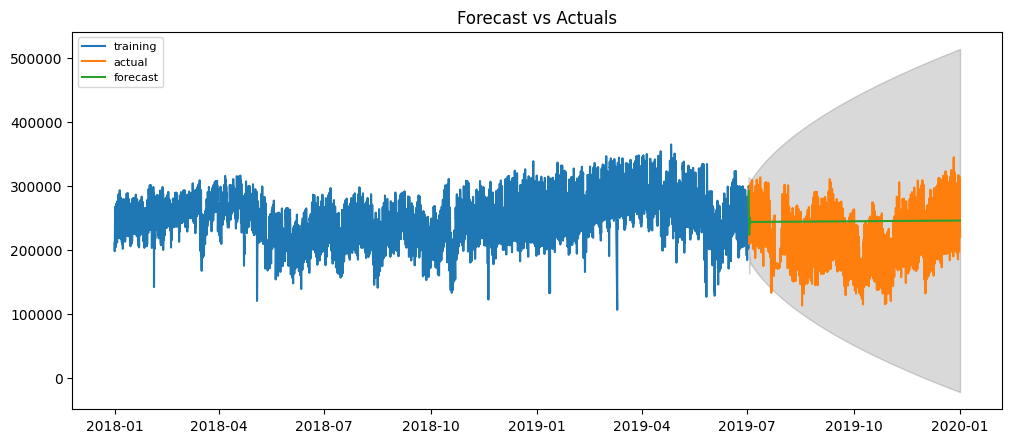

In [ ]:
# Build Model
model = ARIMA(train, order=(5, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(4380, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


{'acf1': 0.9506626285276888,
 'corr': 0.05849111319978881,
 'mae': 40927.27609167388,
 'mape': 0.2191114659293304,
 'me': 27974.240634209124,
 'minmax': 0.16335636884370297,
 'mpe': 0.17338850477595033,
 'rmse': 50105.65514991613}

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
model = pm.auto_arima(df.BESCOM, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=1, max_q=1, # maximum p and q
                      m=3,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


/root/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=376946.725, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=484332.006, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=471416.602, Time=1.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=376406.766, Time=4.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409397.064, Time=2.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=378739.003, Time=1.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=421279.403, Time=0.48 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 10.708 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                17520
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -188199.383
Date:                Fri, 28 May 2021   AIC                         376406.766
Time:                     

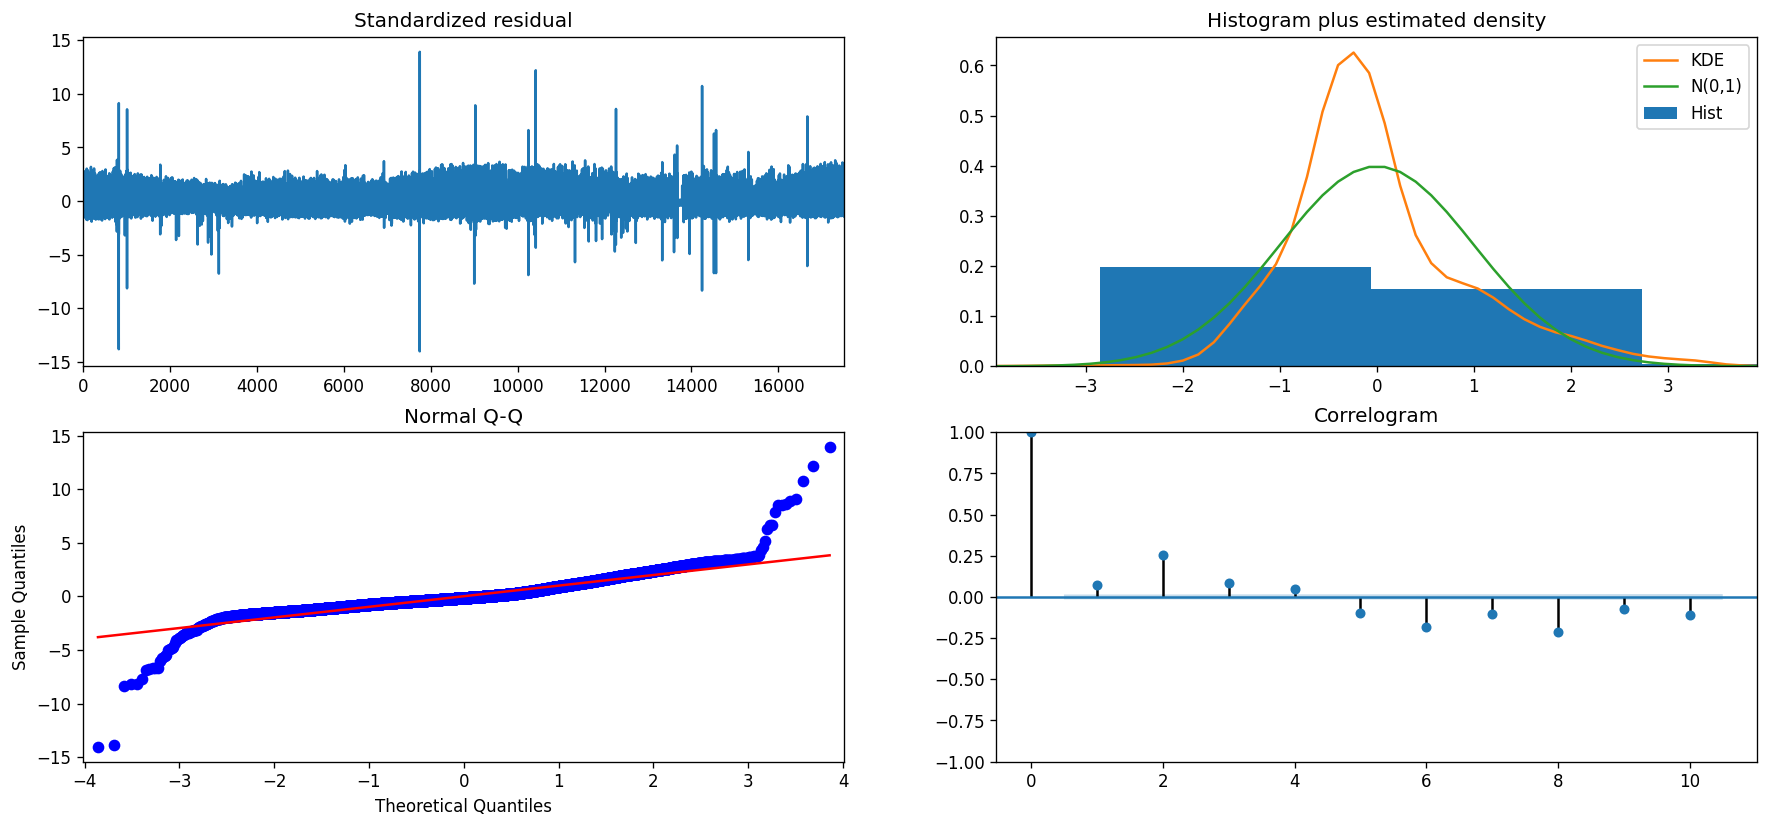

In [ ]:
model.plot_diagnostics(figsize=(18,8))
plt.show()

In [ ]:
# Forecast
n_periods = 4380
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.BESCOM), len(df.BESCOM)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.BESCOM)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Energy Usage")
plt.show()

ValueError: ignored

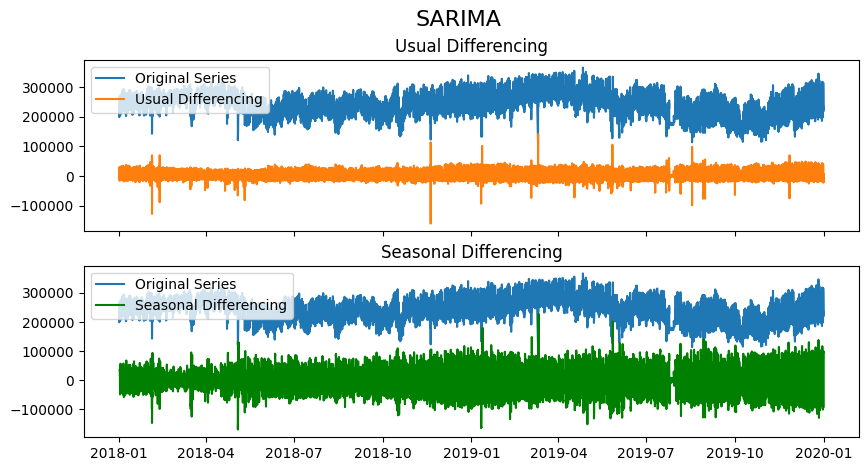

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df[:], label='Original Series')
axes[0].plot(df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df[:], label='Original Series')
axes[1].plot(df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('SARIMA', fontsize=16)
plt.show()

In [ ]:
 !pip3 install pyramid-arima
import pmdarima as pm

     |████████████████████████████████| 522kB 3.0MB/s 
  ERROR: Failed building wheel for pyramid-arima
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dobcluyh/pyramid-arima/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dobcluyh/pyramid-arima/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-14y65tl8/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=95.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=429468.280, Time=1.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=365219.296, Time=45.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=94.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=429466.288, Time=0.75 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=390252.547, Time=3.74 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=155.49 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=364745.445, Time=108.50 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=91.43 sec
